In [109]:
import requests
from StringIO import StringIO
import tempfile
from PIL import Image
import py4j
from py4j.java_gateway import JavaGateway, GatewayParameters

In [2]:
port = py4j.java_gateway.launch_gateway(classpath='/usr/lib/jvm/lib/kaptcha-2.3.2.jar')
gateway = JavaGateway(gateway_parameters=GatewayParameters(port=port))

In [200]:
kaptcha = gateway.jvm.com.google.code.kaptcha.impl.DefaultKaptcha()
properties = gateway.jvm.java.util.Properties()
properties.put(constants.KAPTCHA_IMAGE_WIDTH, '223')
properties.put(constants.KAPTCHA_IMAGE_HEIGHT, '50')
properties.put(constants.KAPTCHA_TEXTPRODUCER_FONT_SIZE, '40')
properties.put(constants.KAPTCHA_TEXTPRODUCER_FONT_NAMES, 'Ubuntu Light')
properties.put(constants.KAPTCHA_BORDER, 'no')
kaptchaConfig = gateway.jvm.com.google.code.kaptcha.util.Config(properties)
kaptcha.setConfig(kaptchaConfig)

### 生成图片

223 50


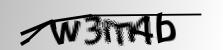

In [254]:
# code = kaptcha.createText()
code = 'w3m4b'
image = kaptcha.createImage(code)
filename = tempfile.mktemp(suffix='.jpg')
f = gateway.jvm.java.io.File(filename)
ImageIO = gateway.jvm.javax.imageio.ImageIO
ImageIO.write(image, 'JPG', f)
image = Image.open(filename)
print image.width, image.height
image

### 网站图片

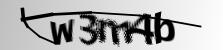

In [252]:
url = 'https://s.nacao.org.cn/servlet/ValidateCode?time='
response = requests.get(url)
image = Image.open(StringIO(response.content))
image